<a href="https://colab.research.google.com/github/ArseniusNott/60DaysofUdacity/blob/master/Chest%2520X-Ray%2520Dataset%2520Preprocessing/04_Chest_X_Ray_Data_Preparation_with_8_Classess_Increased_Images.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# necessary imports
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

import os
import shutil

In [0]:
# uploaded the kaggle API. You do not need to know this :D
from google.colab import files
files.upload()

!pip install -q kaggle
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 /root/.kaggle/kaggle.json

Saving kaggle.json to kaggle (1).json


In [0]:
!kaggle datasets download -d nih-chest-xrays/data --force

100% 42.0G/42.0G [08:33<00:00, 123MB/s]
100% 42.0G/42.0G [08:33<00:00, 87.8MB/s]


In [0]:
data_location = "/content/x_ray_dataset"
import zipfile
with zipfile.ZipFile("./data.zip", 'r') as zip_ref:
    zip_ref.extractall(data_location)

In [0]:
# extract each image in x_ray_images_folder
import glob, os

zip_files = []
os.chdir(data_location)
for file in glob.glob("*.zip"):
    zip_files.append(file)

In [0]:
# extract zip files and remove zip files that are already been extracted
images_directory = "/content/x_ray_dataset/images"
for filename in os.listdir(data_location):
    if filename.endswith(".zip"):
        print(filename)
        try:
            zip = zipfile.ZipFile(filename)
            zip.extractall(path=images_directory)
        except zipfile.BadZipfile as e:
            print("BAD ZIP: "+filename)
        
        # remove zip file
        try:
            os.remove(filename)
        except OSError as e:
            if e.errno != errno.ENOENT: 
                raise 

images_012.zip
images_011.zip
images_004.zip
images_009.zip
images_010.zip
images_005.zip
images_008.zip
images_003.zip
images_006.zip
images_002.zip
images_001.zip
images_007.zip


In [0]:
data_entry = pd.read_csv("/content/x_ray_dataset/Data_Entry_2017.csv")
data_entry.head()

def create_bar_plot_from_value_counts(df, custom_title):
    sns.barplot(df.index, df.values)
    plt.title(custom_title)
    plt.ylabel('Number of Occurrences', fontsize=12)
    plt.xlabel('Classes', fontsize=12)
    plt.xticks(rotation='vertical')
    plt.figure(figsize=(10,5))
    plt.show()

In [0]:
# parse classes per image and put them in their respective columns
data_entry_bck = pd.DataFrame.copy(data_entry)
classes = data_entry.loc[:, "Finding Labels"].str.split("|", expand = True) 

for i in range(classes.shape[1]):
    column_name = "Label " + str(i + 1)
    data_entry[column_name] = classes[i]

In [0]:
data_entry.head()

,Image Index,Finding Labels,Follow-up #,Patient ID,Patient Age,Patient Gender,View Position,OriginalImage[Width,Height],OriginalImagePixelSpacing[x,y],Unnamed: 11,Label 1,Label 2,Label 3,Label 4,Label 5,Label 6,Label 7,Label 8,Label 9
0,00000001_000.png,Cardiomegaly,0,1,58,M,PA,2682,2749,0.143,0.143,NaN,Cardiomegaly,None,None,None,None,None,None,None,None
1,00000001_001.png,Cardiomegaly|Emphysema,1,1,58,M,PA,2894,2729,0.143,0.143,NaN,Cardiomegaly,Emphysema,None,None,None,None,None,None,None
2,00000001_002.png,Cardiomegaly|Effusion,2,1,58,M,PA,2500,2048,0.168,0.168,NaN,Cardiomegaly,Effusion,None,None,None,None,None,None,None
3,00000002_000.png,No Finding,0,2,81,M,PA,2500,2048,0.171,0.171,NaN,No Finding,None,None,None,None,None,None,None,None
4,00000003_000.png,Hernia,0,3,81,F,PA,2582,2991,0.143,0.143,NaN,Hernia,None,None,None,None,None,None,None,None


In [0]:
# unique classes
unique_classes = classes[0].unique()
print(unique_classes)

['Cardiomegaly' 'No Finding' 'Hernia' 'Mass' 'Infiltration' 'Effusion'
 'Nodule' 'Emphysema' 'Atelectasis' 'Pleural_Thickening' 'Pneumothorax'
 'Fibrosis' 'Consolidation' 'Edema' 'Pneumonia']


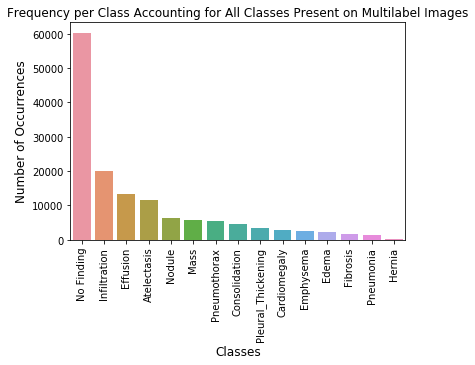

<Figure size 720x360 with 0 Axes>

No Finding            60361
Infiltration          19894
Effusion              13317
Atelectasis           11559
Nodule                 6331
Mass                   5782
Pneumothorax           5302
Consolidation          4667
Pleural_Thickening     3385
Cardiomegaly           2776
Emphysema              2516
Edema                  2303
Fibrosis               1686
Pneumonia              1431
Hernia                  227
Name: value, dtype: int64


In [0]:
frequency_of_classes_present_in_all_images = classes[:].melt().iloc[:,1].value_counts()

create_bar_plot_from_value_counts(frequency_of_classes_present_in_all_images,
                                 "Frequency per Class Accounting for All Classes Present on Multilabel Images")

print(frequency_of_classes_present_in_all_images)


In [0]:
# We are only interested in images with only one classes in them so we need to extract them using the following function

def read_csv_file(csv_filename, chunksize=10):
    indexer = 0
    
    columns = ["Image Index", "Finding Labels", "View Position"]
    
    images_and_labels = []
    
    count = 0
    for chunk in pd.read_csv(csv_filename, chunksize=chunksize):
        
        if(indexer == 10):
            break;
        
        image_indexes = chunk.iloc[:, 0]
        image_labels = chunk.iloc[:, 1]
        view_position = chunk.iloc[:, 6]
        
        for i in range(len(image_indexes)):
            split_length = len(image_labels.iloc[i].split("|"))
            if(split_length == 1):
                count = count + 1
                images_and_labels.append([image_indexes.iloc[i], 
                                          image_labels.iloc[i],
                                          view_position.iloc[i]
                                         ])
                
    images_and_labels = pd.DataFrame.from_records(images_and_labels, columns=columns)
    
    return images_and_labels
        
images_with_one_label = read_csv_file("/content/x_ray_dataset/Data_Entry_2017.csv", 
                                      chunksize=10)

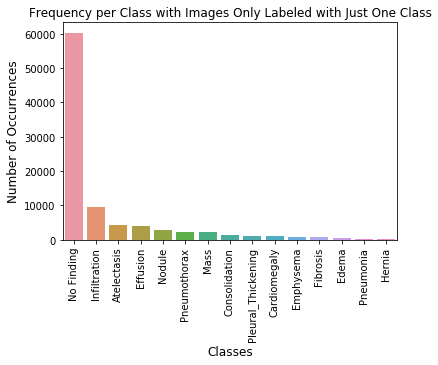

<Figure size 720x360 with 0 Axes>

No Finding            60361
Infiltration           9547
Atelectasis            4215
Effusion               3955
Nodule                 2705
Pneumothorax           2194
Mass                   2139
Consolidation          1310
Pleural_Thickening     1126
Cardiomegaly           1093
Emphysema               892
Fibrosis                727
Edema                   628
Pneumonia               322
Hernia                  110
Name: Finding Labels, dtype: int64


In [0]:
frequency_of_classes_for_images_with_sole_class_labels = images_with_one_label["Finding Labels"].value_counts()

create_bar_plot_from_value_counts(frequency_of_classes_for_images_with_sole_class_labels,
                                 "Frequency per Class with Images Only Labeled with Just One Class")

print(frequency_of_classes_for_images_with_sole_class_labels)

In [0]:
# Separate images in their respective directories
# for the lack of good directory name, use images_per_class

images_per_class_directory = "/content/x_ray_dataset/images_per_class/"

def create_directories_from_unique_categories(base_directory, unique_classes):
    # create directories if not existing
    for index, category in enumerate(unique_classes):
        if not os.path.exists(base_directory + category):
            os.makedirs(base_directory + category, mode=777)

# copy images from their respective directories
def copy_images_from_their_respective_directories(source_directory, destination_directory, images_with_one_label):
    images_with_one_label_length = len(images_with_one_label)
    
    print("Copying {} images in theire respective directories...".
          format(images_with_one_label_length))
    
    for i in range(images_with_one_label_length):
        image_name = images_with_one_label.iloc[i, 0]
        image_label = images_with_one_label.iloc[i, 1]
        
        for root, dirs, files in os.walk(source_directory):
            if image_name in files:
                shutil.copy(os.path.join(root, image_name), os.path.join(destination_directory, image_label))
                continue
                
        if i % 1000 == 0:
            print("Images uploaded {} of {}".
                  format(i, images_with_one_label_length))
    print("Image upload complete.")

In [0]:
# DO NOT EXECUTE THIS. THIS IS NOT NEEDED
create_directories_from_unique_categories(images_per_class_directory, 
                                          unique_classes)
# DO NOT EXECUTE THIS. THIS IS NOT NEEDED
copy_images_from_their_respective_directories("/content/x_ray_dataset/images/", 
                                              "/content/x_ray_dataset/images_per_class/", 
                                              images_with_one_label)

In [0]:
np.random.seed(1111)

classes_to_select = ["No Finding", "Atelectasis", "Nodule", 
                     "Pleural_Thickening", "Cardiomegaly", "Emphysema", "Edema", 
                     "Effusion"]
default_columns = ["Image Index", "Finding Labels", "View Position"]

images_with_one_label[images_with_one_label["Finding Labels"].isin(classes_to_select)]["Finding Labels"].value_counts()

No Finding            60361
Atelectasis            4215
Effusion               3955
Nodule                 2705
Pleural_Thickening     1126
Cardiomegaly           1093
Emphysema               892
Edema                   628
Name: Finding Labels, dtype: int64

In [0]:
def sample_from_different_classes(images_with_one_label, classes_to_select, 
                                  default_columns, images_to_exclude=None, 
                                  is_training=True):
    selected_images = []
    
    if images_to_exclude is not None:
        images_with_one_label = images_with_one_label[~images_with_one_label["Image Index"].isin(images_to_exclude)]
    
    for index, class_name in enumerate(classes_to_select):
        images_per_class = images_with_one_label[
            images_with_one_label["Finding Labels"] == class_name]
        
        if is_training == True:
            if class_name == "Edema":
                filtered = images_per_class.sample(n=400, replace=False)
            elif class_name == "Emphysema":
                filtered = images_per_class.sample(n=600, replace=False)
            elif class_name == "Cardiomegaly":
                filtered = images_per_class.sample(n=800, replace=False)
            elif class_name == "Pleural_Thickening":
                filtered = images_per_class.sample(n=900, replace=False)
            elif class_name == "No Finding":
                filtered = images_per_class.sample(n=3000, replace=False)
            else:
                filtered = images_per_class.sample(n=1000, replace=False)
        else:
            filtered = images_per_class.sample(n=100, 
                                               replace=False)

        for i in range(len(filtered)):
            selected_images.append([filtered.iloc[i, 0], 
                                    filtered.iloc[i, 1],
                                    filtered.iloc[i, 2]])
        
    return pd.DataFrame.from_records(selected_images, columns=default_columns)

sampled_images_train = sample_from_different_classes(images_with_one_label, classes_to_select, default_columns, 
                                                     images_to_exclude=None, is_training=True)

# since we wont use images that are part of training, we exclude
images_to_exclude = sampled_images_train.loc[:, "Image Index"]
sampled_images_validation = sample_from_different_classes(images_with_one_label, classes_to_select, default_columns, 
                                                     images_to_exclude=images_to_exclude, is_training=False)

# since we won't use images that are part of training and validation, we exclude
images_to_exclude = images_to_exclude.append(sampled_images_validation.loc[:, "Image Index"])

sampled_images_test = sample_from_different_classes(images_with_one_label, classes_to_select, default_columns, 
                                                    images_to_exclude=images_to_exclude, is_training=False)

In [0]:
# create new classes
new_classes = list(sampled_images_train.iloc[:, 1].unique())

# create respective directory
train_dataset_directory = "/content/x_ray/train/"

create_directories_from_unique_categories(train_dataset_directory, 
                                          new_classes)


In [0]:
# copy training set in their respective directories
train_source_directory = "/content/x_ray_dataset/images/"
train_destination_directory = "/content/x_ray/train/"
copy_images_from_their_respective_directories(train_source_directory, 
                                              train_destination_directory, 
                                              sampled_images_train)

Copying 8700 images in theire respective directories...
Images uploaded 0 of 8700
Images uploaded 1000 of 8700
Images uploaded 2000 of 8700
Images uploaded 3000 of 8700
Images uploaded 4000 of 8700
Images uploaded 5000 of 8700
Images uploaded 6000 of 8700
Images uploaded 7000 of 8700
Images uploaded 8000 of 8700
Image upload complete.


In [0]:
def copy_image_to_directory(source_directory, destination_directory, images_with_one_label):
    images_with_one_label_length = len(images_with_one_label)
    
    if not os.path.exists(destination_directory):
        os.makedirs(destination_directory, mode=777)
    
    print("Copying {} images all in one directory...".
          format(images_with_one_label_length))
    
    for i in range(images_with_one_label_length):
        image_name = images_with_one_label.iloc[i, 0]
        
        for root, dirs, files in os.walk(source_directory):
            if image_name in files:
                shutil.copy(os.path.join(root, image_name), os.path.join(destination_directory))
                
        if i % 100 == 0:
            print("Images uploaded {} of {}".
                  format(i, images_with_one_label_length))
    print("Image upload complete.")

In [0]:
# for validation
validation_source_directory = "/content/x_ray_dataset/images/"
validation_destination_directory = "/content/x_ray/validation/"

# create directories
create_directories_from_unique_categories(validation_destination_directory, 
                                          new_classes)

copy_images_from_their_respective_directories(validation_source_directory, 
                                              validation_destination_directory, 
                                              sampled_images_validation)

Copying 800 images in theire respective directories...
Images uploaded 0 of 800
Image upload complete.


In [0]:
# for test
test_source_directory = "/content/x_ray_dataset/images/"
test_destination_directory = "/content/x_ray/test/"

# create directories
create_directories_from_unique_categories(test_destination_directory, 
                                          new_classes)

copy_images_from_their_respective_directories(test_source_directory, 
                        test_destination_directory, 
                        sampled_images_test)

Copying 800 images in theire respective directories...
Images uploaded 0 of 800
Image upload complete.


In [0]:
# write csvs for train, test, and validation
sampled_images_train.to_csv (r'/content/x_ray/train.csv', index = None, header=True)
sampled_images_validation.to_csv (r'/content/x_ray/validation.csv', index = None, header=True)
sampled_images_test.to_csv (r'/content/x_ray/test.csv', index = None, header=True)

In [0]:
# copy necessary pdfs and csvs
! cp *.pdf /content/x_ray/
! cp *.csv /content/x_ray/

In [0]:
# put to zip file

from zipfile import *
with ZipFile('/content/x_ray_v3.zip', 'w') as zipObj:
   # Iterate over all the files in directory
   for folderName, subfolders, filenames in os.walk("/content/x_ray/"):
       for filename in filenames:
           #create complete filepath of file in directory
           filePath = os.path.join(folderName, filename)
           # Add file to zip
           zipObj.write(filePath)

In [0]:
# for upload to Google Drive
!cd ~
!wget https://docs.google.com/uc?id=0B3X9GlR6EmbnWksyTEtCM0VfaFE&export=download


--2019-08-15 15:32:43--  https://docs.google.com/uc?id=0B3X9GlR6EmbnWksyTEtCM0VfaFE
Resolving docs.google.com (docs.google.com)... 74.125.20.102, 74.125.20.100, 74.125.20.101, ...
Connecting to docs.google.com (docs.google.com)|74.125.20.102|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-0c-48-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/lehc6oc5bq5emi5e243j4hc2dcuqdme7/1565877600000/15876260727594163214/*/0B3X9GlR6EmbnWksyTEtCM0VfaFE [following]
--2019-08-15 15:32:45--  https://doc-0c-48-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/lehc6oc5bq5emi5e243j4hc2dcuqdme7/1565877600000/15876260727594163214/*/0B3X9GlR6EmbnWksyTEtCM0VfaFE
Resolving doc-0c-48-docs.googleusercontent.com (doc-0c-48-docs.googleusercontent.com)... 74.125.142.132, 2607:f8b0:400e:c08::84
Connecting to doc-0c-48-docs.googleusercontent.com (doc-0c-48-docs.googleusercontent.com)|74.125.142.132|:443... connect

In [0]:
!mv uc\?id\=0B3X9GlR6EmbnWksyTEtCM0VfaFE gdrive

In [0]:
!chmod +x gdrive

In [0]:
!sudo install gdrive /usr/local/bin/gdrive

In [0]:
rm -rf ~/.gdrive/token_*.json

In [0]:
!gdrive list

Authentication needed
Go to the following url in your browser:
https://accounts.google.com/o/oauth2/auth?access_type=offline&client_id=367116221053-7n0vf5akeru7on6o2fjinrecpdoe99eg.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&response_type=code&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive&state=state

Enter verification code: 4/pAF1x5l77SkmkLIsDi14VdfknjxurK-Ywm3V8zhWAaRgh9lNORu7hLY
Id                                          Name                Type   Size       Created
1ApvymBL3cPECtL-0YAkXxfix9VuNamV_           x_ray_v2.zip        bin    2.2 GB     2019-08-13 18:18:16
1JDd5FM-a1C6bU6OzO4k9FrfR9xnfYxu_           x_ray.zip           bin    1.9 GB     2019-08-12 18:58:51
1jyOfOToLt0cxyrFK_tn76JxxZ7-smvVq           x_ray_dataset.zip   bin    45.1 GB    2019-08-10 15:45:45
0B_TPiQa2X5bLc3RhcnRlcl9maWxlX2Rhc2hlclYw   Getting started     bin    696.8 KB   2017-08-27 04:15:09


In [0]:
! gdrive upload /content/x_ray_v3.zip

Uploading /content/x_ray_v3.zip
Uploaded 1TFTlZLuZolCPkTojMOKTOqTzr9dnFSUB at 35.0 MB/s, total 4.2 GB
